# Two Variable Linear Regression

## Overview

In this notebook I will be taking the data from two excel file "Simple one year academic data"  both AS and A2 and creating a data frame using the pandas library. I have deliberately split an excel sheet into two seperate files to explore putting them back together in python.  

As an academic exercise I will also be creating an SQL relation database with two "pages" and using the Student Id as a relational tag.

The data will be saved in the github so you can reproduce the results by changing the file name to a URL

After combining the data some basic analysis will be completed demonstrating several graph types.

Then a simple linear regression model will be run, splitting the data into learning and testing data.




## Step one: Load and clean

Load the data from the excel file and create two data frames "dfAS" and "dfA2" for the AS and A2 results.

### Tips and tricks:

Don't forget the file extension (i.e. .xlsx)

Also, for literal pathways sometimes you need a letter 'r' before the path

In [1]:
#this will keep all our graphs in the page
%matplotlib inline
# a few libraries that we will need

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options




# We need this library to read excel workbooks
import openpyxl 
#this allows you to open older versions of excel
import xlrd

# This should take the first sheet and use the first row as header and create a data frame
excel_file_as = (r"C:\Users\Mrs Farrelly\Documents\Academic data\Simple one year academic data AS results.xlsx")
df_file_as = pd.read_excel(excel_file_as, sheet_name = 0, header = 0)


excel_file_a2 = (r"C:\Users\Mrs Farrelly\Documents\Academic data\Simple one year academic data A2 results.xlsx")
df_file_a2 = pd.read_excel(excel_file_a2, sheet_name = 0, header = 0)

#Lets have a look at the first 5 rows and see if it worked
df_file_a2.head()

,Student Id,A2 Values
0,2598,589
1,2544,573
2,2592,573
3,2619,570
4,2582,565


In [2]:
df_file_as.head()

,Student Id,AS Values
0,2598,294
1,2544,295
2,2592,287
3,2619,278
4,2582,296


Now lets have a look at the data to make sure there aren't any missing values, unexpected 0's etc

In [3]:
print (df_file_as.dtypes)


Student Id    int64
AS Values     int64
dtype: object


In [4]:
df_file_as.describe()

,Student Id,AS Values
count,72.000000,72.000000
mean,2547.819444,234.375000
std,151.254969,49.195625
min,2409.000000,0.000000
25%,2484.250000,207.500000
50%,2540.500000,243.000000
75%,2581.250000,271.750000
max,3714.000000,296.000000


In [5]:
df_file_as.shape

(72, 2)

Hmmmm, a min value of 0 either means someone had a really bad day at the office or a missing result was passed as a 0. This is also way smaller than 2 times the STD below the mean so it would certainly come out as an outlier.

Also the column names having spaces in them are going to cause syntax issues.  Lets rename them with underscores.  Notice the inplace = True changes the original data frame.  I would say usually this is not a good idea and we should create new data frames when we make changes so we can track the changes.

In [6]:
df_file_as.rename(columns = {'AS Values':'AS_Values'}, inplace = True)
                    

WE can see here the new column name. 

In [7]:
df_file_as.head()

,Student Id,AS_Values
0,2598,294
1,2544,295
2,2592,287
3,2619,278
4,2582,296


Lets change the Student Id as well but this time lets create a new data frame

In [8]:
df_as_new = df_file_as.rename(columns = {'Student Id':'Student_Id'})

In [9]:
df_as_new.head()

,Student_Id,AS_Values
0,2598,294
1,2544,295
2,2592,287
3,2619,278
4,2582,296


Now lets go and change the A2 headers in the same way

In [10]:
df_a2_new = df_file_a2.rename(columns = {'Student Id':'Student_Id','A2 Values':'A2_Values'})
df_a2_new.head()

,Student_Id,A2_Values
0,2598,589
1,2544,573
2,2592,573
3,2619,570
4,2582,565


In [11]:
df_a2_new.shape

(72, 2)

Now let's go and have a look at that 0 value using the .query()

In [12]:
df_as_new.query("AS_Values == 0")

,Student_Id,AS_Values
14,3714,0


Looks like there is only "0" value so just getting rid of it won't cause too many problems with reducing the data size. Notice also that I've kept the name this time so I don't have to be so creative

In [13]:
df_as_new = df_as_new.drop(df_as_new.index[14])

In [14]:
df_as_new.describe()

,Student_Id,AS_Values
count,71.000000,71.000000
mean,2531.394366,237.676056
std,59.186263,40.730745
min,2409.000000,134.000000
25%,2483.500000,209.000000
50%,2537.000000,243.000000
75%,2580.500000,272.500000
max,2624.000000,296.000000


In [15]:
df_as_new.shape

(71, 2)

We can see that the number of columns is still 2 and the number of rows has reduced to 71.  This may create a problem when we combine our data sets so we will have to be careful to clean it up afterwards and match it using Student_Id. We can either combine at this stage or do some initial plots.  Let's go ahead and combine so we can use subplots in our comparisons.

# Step two: Combining

So let's use a concatonate statement to combine the two dataframes.  This seems ideal because the Student_Id's are in the same order. But wait I errased AS_Values row 14 when I was cleaning the data.

In [16]:
df_col_merged =pd.concat([df_as_new, df_a2_new], axis=1)
df_col_merged.head()

,Student_Id,AS_Values,Student_Id,A2_Values
0,2598.0,294.0,2598,589
1,2544.0,295.0,2544,573
2,2592.0,287.0,2592,573
3,2619.0,278.0,2619,570
4,2582.0,296.0,2582,565


In [17]:
df_col_merged.shape

(72, 4)

But wait I errased AS_Values row 14 when I was cleaning the data. Lets take a look at that column and see what has happened.


In [18]:
df_col_merged.loc[12:16]

,Student_Id,AS_Values,Student_Id,A2_Values
12,2478.0,264.0,2478,538
13,2537.0,277.0,2537,535
14,NaN,NaN,3714,534
15,2419.0,264.0,2419,532
16,2536.0,283.0,2536,528


We can see now that there is an NaN for AS_Values and the first Student_Id but the other row have matched up.  Let's drop the 14th row again and also get rid of the second Student_Id

In [19]:
df_cleaned = df_col_merged.drop(df_col_merged.index[14])
df_cleaned.loc[12:16]

,Student_Id,AS_Values,Student_Id,A2_Values
12,2478.0,264.0,2478,538
13,2537.0,277.0,2537,535
15,2419.0,264.0,2419,532
16,2536.0,283.0,2536,528


In [20]:
df_cleaned =df_cleaned.T.drop_duplicates().T
df_cleaned.loc[12:16]

,Student_Id,AS_Values,A2_Values
12,2478.0,264.0,538.0
13,2537.0,277.0,535.0
15,2419.0,264.0,532.0
16,2536.0,283.0,528.0


as we can see we still have all the corresponding values matching up but now we don't have Student_Id twice

# A few graphs

Lets have a look at a couple of graphs to see what our data looks like.

This is always a good idea.  If our data is normally distributed (or approximately) we can make assumptions about our data and then find means, confidence intervals and perform hypothesis tests which is the basics of data analysis.

We can also see if our data is suitable for a regression analysis (in other words if it is correlated).  Just remember, correlation does not mean causation and industry sector specialisation will help with avoiding making spurious correlations.

Check out this link for some spurious correlations...certainly improved my day.

http://www.tylervigen.com/spurious-correlations




### Histogram

Lets use seaborn and put some plots in to have a look at both sets of data.  You can find all the different meanings for things like "notebook" and "whitegrid" on this link

https://seaborn.pydata.org/tutorial/aesthetics.html


237.67605633802816 237.67605633802816 243.0


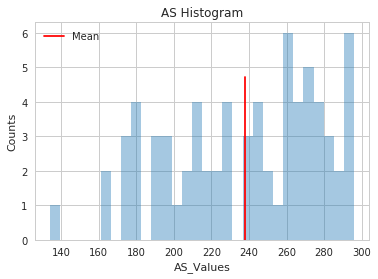

In [21]:
#Setting out the column name and data frame name will keep you code dry here.
df_name = df_cleaned
#I tried to set out column_name here to take values to I didn't have to change it in each plot
#but I couldn't get it to work

#column_name = AS_Values

sns.set_context("notebook")
mean_column= df_name.AS_Values.mean()
#make some adjustments to the subplot spacing

#you can get means and medians in different ways
print (mean_column, np.mean(df_name.AS_Values), df_name.AS_Values.median())
with sns.axes_style("whitegrid"):
    df_name.AS_Values.hist(bins=30, alpha=0.4);
    plt.plot()
    plt.axvline(mean_column, 0, 0.75, color='r', label='Mean')
    #plt.ylim(0, 8) added these in for future reference
    #plt.xlim(300, 600)
    plt.xlabel("AS_Values")
    plt.ylabel("Counts")
    plt.title("AS Histogram")
    plt.legend()
    #sns.despine()
    

468.80281690140845 468.80281690140845 489.0


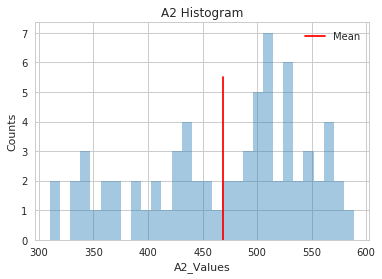

In [22]:
#Setting out the column name and data frame name will keep you code dry here.
df_name = df_cleaned
#column_name = A2_Values

sns.set_context("notebook")
mean_column=df_name.A2_Values.mean()
#you can get means and medians in different ways
print (mean_column, np.mean(df_name.A2_Values), df_name.A2_Values.median())
with sns.axes_style("whitegrid"):
    df_name.A2_Values.hist(bins=30, alpha=0.4);
    plt.plot()
    plt.axvline(mean_column, 0, 0.75, color='r', label='Mean')
    #axes.set_ylim([ymin,20])
    #plt.ylim(0, 8)
    #plt.xlim(300, 600)
    plt.xlabel("A2_Values")
    plt.ylabel("Counts")
    plt.title("A2 Histogram")
    plt.legend()
    #sns.despine()

It not surprising that this does not produce a very nice histogram.  With only 71 data points and the information only taken over one year there is a great  deal of spread about the data.



### Scatter plot

Here we can plot the AS_Values against the A2_Values to see if there is a correlation

Text(0,0.5,'A2_Values')

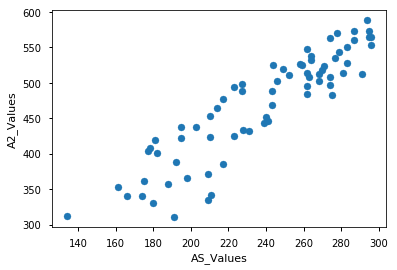

In [23]:
plt.scatter(df_cleaned.AS_Values, df_cleaned.A2_Values)
#plt.xlim([1900,2010]) we don't need a data limit here but this is how you add one.
plt.xlabel("AS_Values")
plt.ylabel("A2_Values")


Lets get rid of some of the graph noise to make it a little easier to look at.

In [24]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

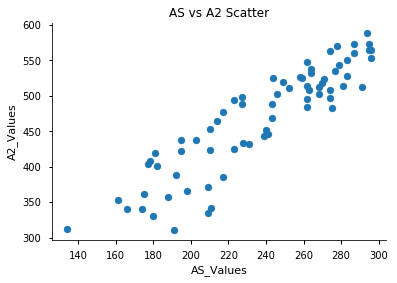

In [25]:
plt.scatter(df_cleaned.AS_Values, df_cleaned.A2_Values)
#plt.xlim([1900,2010]) we don't need a data limit here but this is how you add one.
plt.xlabel("AS_Values")
plt.ylabel("A2_Values")
plt.title("AS vs A2 Scatter")
remove_border()

It looks like there is a pretty strong positive corelation here.  The next thing to do is go and run a basic linear regression model which we can talk about in the next section.

## Linear regression

Now lets take a look at the regression coefficients and regression line.

There are a bunch of ways to complete a linear regression.  Probably the most popular way is to use Scikit-learn but if you'd like to know more there are 8 popular ways on this website all with different memory alloactions, the most cost effective being the matrix algebra method but you need to know a little matrix algebra to make it work.

https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b

Also, just typing linear regression in python into google will get you started. A great github page with all the code you could need is just here below.  It's kind of the users guild to Machine Learning both unsupervised and supervised.

http://www.math.unipd.it/~aiolli/corsi/1213/aa/user_guide-0.12-git.pdf

The post below is an adaptation from this page which does a better job of defining all the variables needed and adding a useful scatter plot at the end.

I'll post the liner regression section so you can see what they do then show you how I can adapt their code to make my regression work.

## Tips and tricks

the code 
diabetes_X = diabetes.data[:, np.newaxis, 2]
reduces the size of the diabetes_X from (20,10) to (20,1) which is needed for plotting




Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


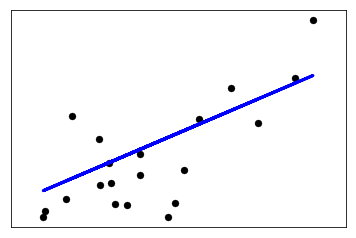

In [39]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


Okay so here is and adaptation for our data on pupil outcomes

In [40]:
print (df_cleaned.shape)

(71, 3)


Coefficients: 
 [[1.68335255]]
Mean squared error: 909.01
R Squared: 0.75
Regression score: 0.75


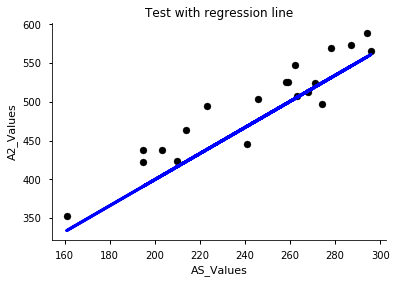

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
#diabetes = datasets.load_diabetes() we don't need this data set to load

#sort the df_clean into order by student_id so it isn't in order by A2_Value
#If i don't do this I will only choose the bottom values as test and it will completely skew my results.
df_cleaned = df_cleaned.sort_values(df_cleaned.columns[0])

# Use only one feature
AS_Values = df_cleaned.iloc[:,1]
A2_Values = df_cleaned.iloc[:,2]

#I then turn my AS and A2 values into data frames to avoid dimensionality problems 
#If i don't do this python will think they are arrays and return a 2D not 1D error
#Hash this out and try it
AS_Values = pd.DataFrame(AS_Values)
A2_Values = pd.DataFrame(A2_Values)



# Split the data into training/testing sets
AS_Values_X_train = AS_Values[:-20]
AS_Values_X_test = AS_Values[-20:]

# Split the targets into training/testing sets
A2_Values_y_train = A2_Values[:-20]
A2_Values_y_test = A2_Values[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(AS_Values_X_train, A2_Values_y_train)

# Make predictions using the testing set
AS_Values_y_pred = regr.predict(AS_Values_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(A2_Values_y_test, AS_Values_y_pred))
# Explained variance score: 1 is perfect prediction
print('R Squared: %.2f' % r2_score(A2_Values_y_test, AS_Values_y_pred))

#add in a regression score just to see what this produces.  Looks like it's the same as r^2
print ("Regression score: %.2f" %regr.score(AS_Values_X_test,A2_Values_y_test))

# Plot outputs
plt.scatter(AS_Values_X_test, A2_Values_y_test,  color='black')
plt.plot(AS_Values_X_test, AS_Values_y_pred, color='blue', linewidth=3)
plt.xlabel("AS_Values")
plt.ylabel("A2_Values")
plt.title("Test with regression line")
remove_border()


this is producing a pretty good R squared value.  This is pretty much all that can be done here. The next thing to do is to move onto a multi-variable linear regression but hat will be in the next notebook.

Also, some documentation on some of the same manipulations done here will be conducted in SQL for completeness.